In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')

In [22]:
# Read data:

data = pd.read_csv('GSS 4.csv')
data.head(10)

,Unnamed: 0,birth_year,region,health,general_happy,past_week_happy,see_friends,see_relatives,income,work_hours,job_satisfaction,weekend_internet,weekday_internet,use_twitter,internet_per_week
0,0,1969.0,New england,Good,Pretty happy,NaN,Sev times a year,Almost daily,170000.0,NaN,Mod. satisfied,NaN,NaN,NaN,NaN
1,1,1955.0,New england,NaN,Pretty happy,NaN,Sev times a year,Sev times a year,54999.0,NaN,Very satisfied,NaN,NaN,No,NaN
2,2,1944.0,New england,Good,Very happy,Most of the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3,3,1973.0,New england,Good,Pretty happy,NaN,Sev times a week,Sev times a week,11249.0,NaN,Very satisfied,NaN,NaN,NaN,NaN
4,4,1961.0,New england,Excellent,Very happy,Most of the time,NaN,NaN,1999.0,NaN,Mod. satisfied,1.0,1.0,No,7.0
5,5,1963.0,New england,NaN,Very happy,NaN,Once a month,Sev times a year,NaN,NaN,Very satisfied,0.0,1.0,No,5.0
6,6,1966.0,New england,Poor,Pretty happy,NaN,Sev times a week,Once a year,170000.0,NaN,Mod. satisfied,NaN,NaN,NaN,NaN
7,7,1993.0,Middle atlantic,Good,Very happy,All or almost all of the time,NaN,NaN,16249.0,NaN,Very satisfied,3.0,2.0,No,16.0
8,8,1971.0,Middle atlantic,Good,Pretty happy,NaN,Never,Once a year,21249.0,NaN,Mod. satisfied,NaN,NaN,NaN,NaN
9,9,1945.0,Middle atlantic,Good,Pretty happy,Most of the time,NaN,NaN,NaN,NaN,NaN,5.0,6.0,No,40.0


In [23]:
# Define function to create frequency plot:

def freq_plot(data, x_axis, hue, x_axis_order, hue_order):

    data_subset = data[data[hue].notnull() & data[x_axis].notnull()]

    hue_df = data_subset[hue]
    x_axis_df = data_subset[x_axis]

    #make a data frame containing frequencies of general happiness within each level of past week happiness
    #(e.g. what percentage of people who reported 'all of the time' past week happiness consider themselves 'very happy'?)
    df = pd.DataFrame(columns = ['value', hue, x_axis])
    
    value_list = []
    h_list = []
    x_list = []

    for h in pd.unique(hue_df):
    
        #get all values where hue is this value
        hue_inds = hue_df == h
    
        for x in pd.unique(x_axis_df):
        
            #get all values where x axis is this value
            x_axis_inds = x_axis_df == x
        
            #get the frequency of hue in this particular x axis category
            value = np.divide(float(sum(hue_inds & x_axis_inds)), float(sum(x_axis_inds)))
        
            value_list.append(value)
            h_list.append(h)
            x_list.append(x)

    df['value'] = value_list
    df[hue] = h_list
    df[x_axis] = x_list
    
    #plot
    ax = sns.barplot(x = x_axis, y = 'value', hue = hue, data = df, order = x_axis_order, hue_order = hue_order)
    ax.set(xlabel= x_axis, ylabel = 'Frequency')
    plt.show()

# Happiness

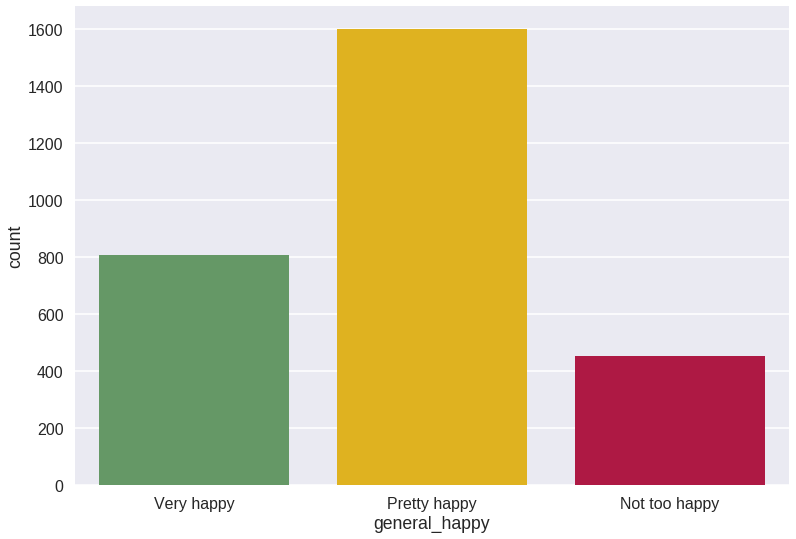

In [24]:
# Plot general happiness:

sns.countplot(data = data, x = 'general_happy',
              order = ['Very happy', 'Pretty happy', 'Not too happy'])
sns.plt.show()

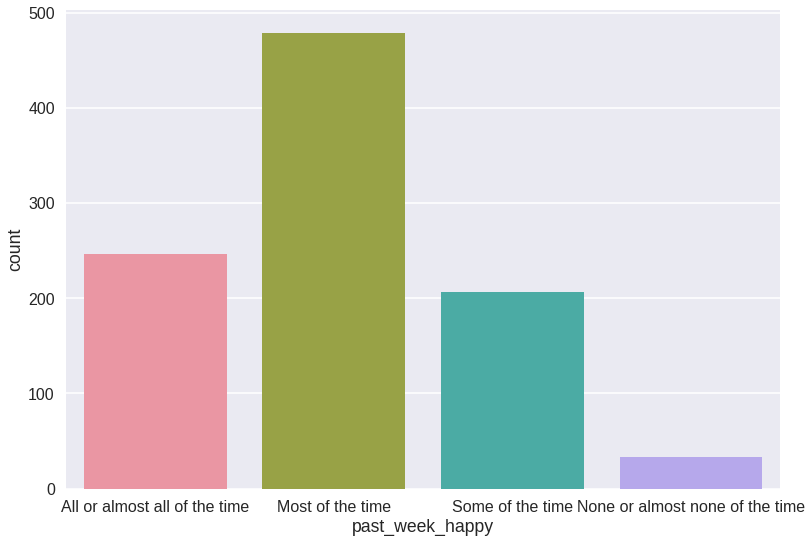

In [25]:
# Plot weekly happiness:

sns.countplot(data = data, x = 'past_week_happy',
              order = ['All or almost all of the time', 'Most of the time', 'Some of the time',
                       'None or almost none of the time'])
sns.plt.show()

# Internet Use

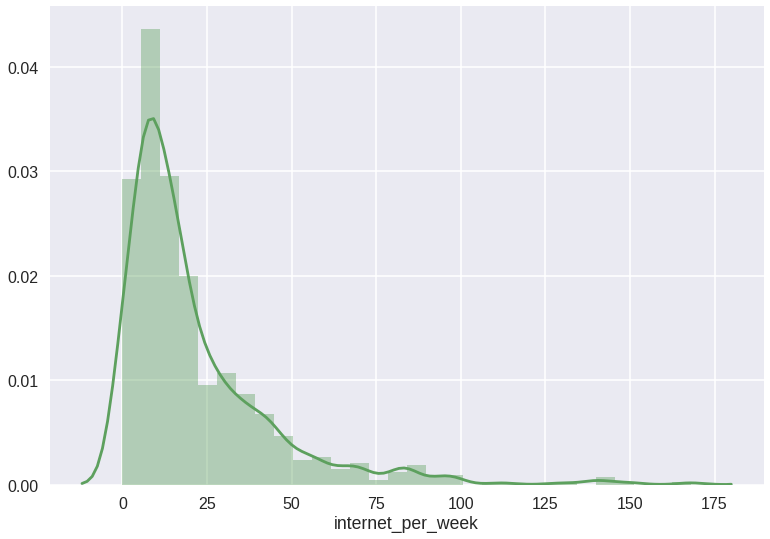

In [26]:
# Plot weekly internet use distribution:

sns.distplot(data['internet_per_week'].dropna(), bins = 30)
sns.plt.show()

# Happiness & Internet Use

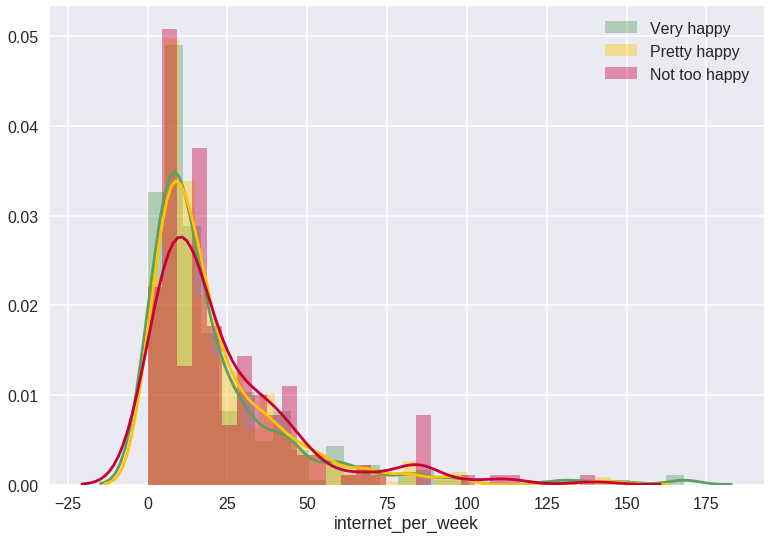

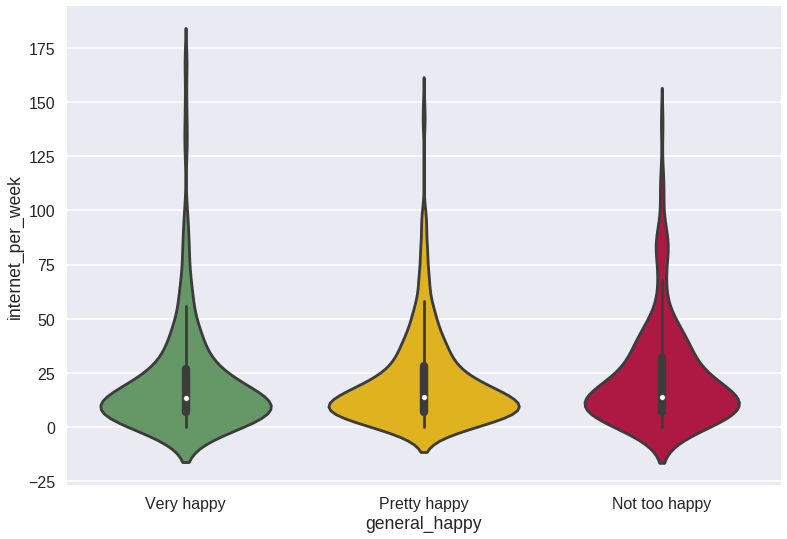

In [34]:
# Plot weekly internet use distribution by general happiness:

for p in ['Very happy', 'Pretty happy', 'Not too happy']:
    sns.distplot(data[data['general_happy'] == p]['internet_per_week'].dropna(), bins = 30, label = p)
sns.plt.legend()
flatui = ["#5DA05E", "#FFC300", "#C70039"]
sns.set_palette(flatui)
sns.plt.show()

sns.violinplot(data = data, x = 'general_happy', y = 'internet_per_week',
               order = ['Very happy', 'Pretty happy', 'Not too happy'])
sns.plt.show()

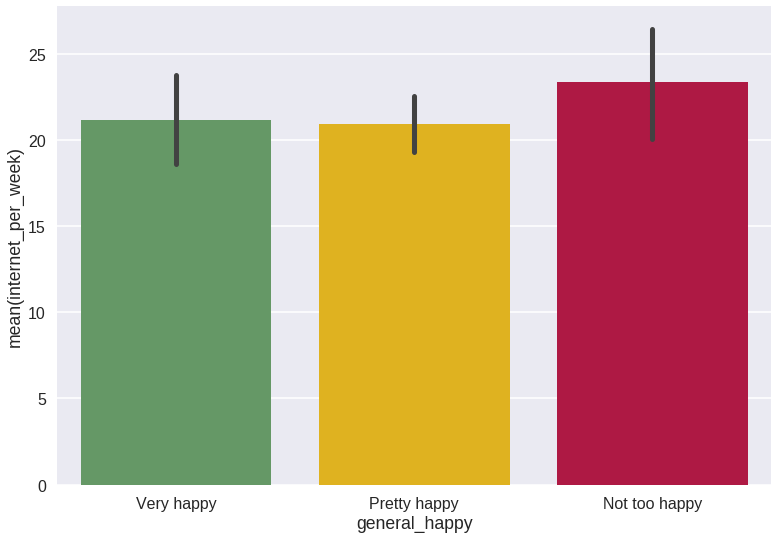

In [28]:
# Plot general internet use by general happiness:

sns.barplot(data = data, x = 'general_happy', y = 'internet_per_week',
            order = ['Very happy', 'Pretty happy', 'Not too happy'])

flatui = ["#5DA05E", "#FFC300", "#C70039"]
sns.set_palette(flatui)
sns.plt.show()

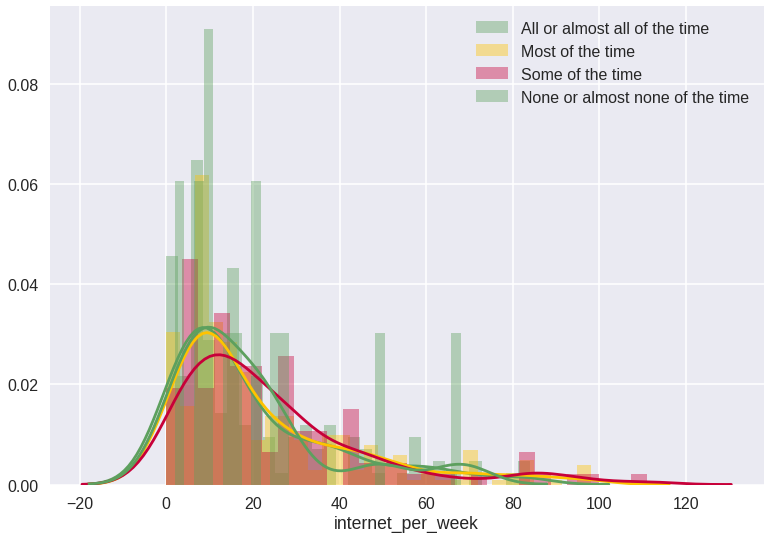

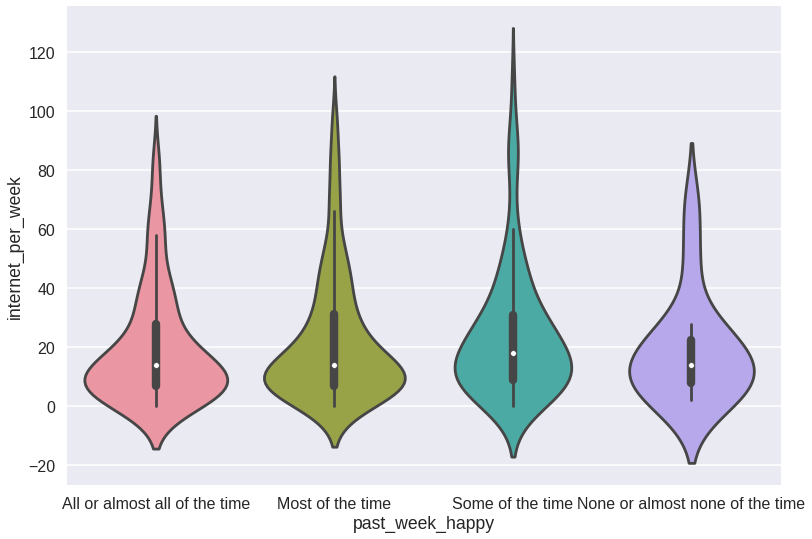

In [29]:
# Plot weekly internet use distribution by weekly happiness:

for p in ['All or almost all of the time', 'Most of the time', 'Some of the time', 'None or almost none of the time']:
    sns.distplot(data[data['past_week_happy'] == p]['internet_per_week'].dropna(), bins = 30, label = p)
sns.plt.legend()
sns.plt.show()

sns.violinplot(data = data, x = 'past_week_happy', y = 'internet_per_week',
               order = ['All or almost all of the time', 'Most of the time', 'Some of the time',
                        'None or almost none of the time'])
sns.plt.show()

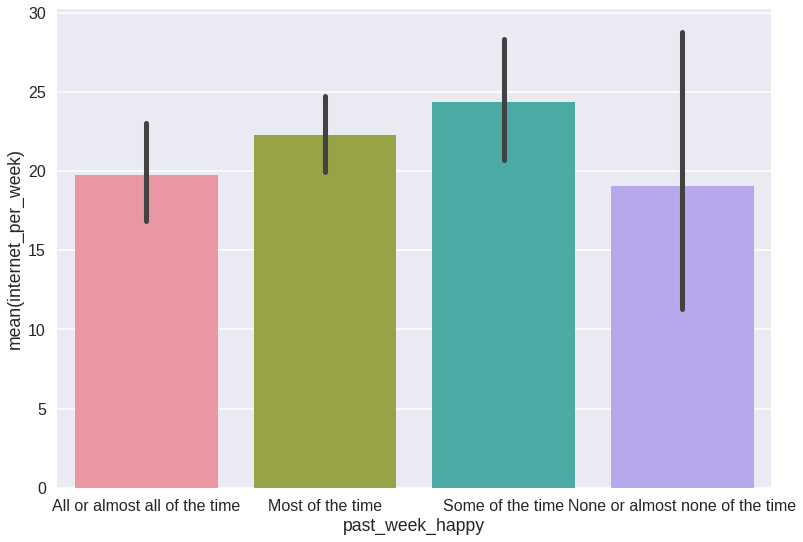

In [30]:
# Plot weekly internet use by weekly happiness:

sns.barplot(data = data, x = 'past_week_happy', y = 'internet_per_week',
            order = ['All or almost all of the time', 'Most of the time', 'Some of the time',
                     'None or almost none of the time'])
sns.plt.show()

# Happiness & Twitter Use

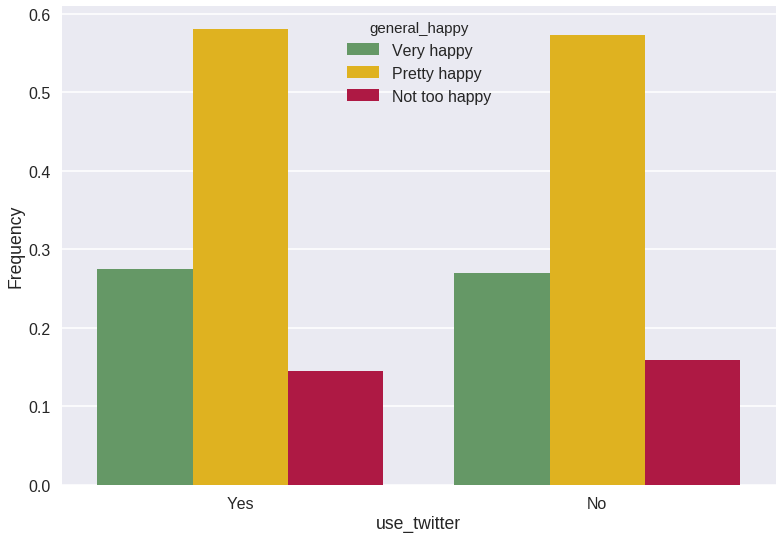

In [35]:
# Plot general happiness by Twitter use:

data = data
x_axis = 'use_twitter'
hue = 'general_happy'
x_axis_order = ['Yes', 'No']
hue_order = ['Very happy', 'Pretty happy', 'Not too happy']

flatui = ["#5DA05E", "#FFC300", "#C70039"]
sns.set_palette(flatui)
freq_plot(data, x_axis, hue, x_axis_order, hue_order)

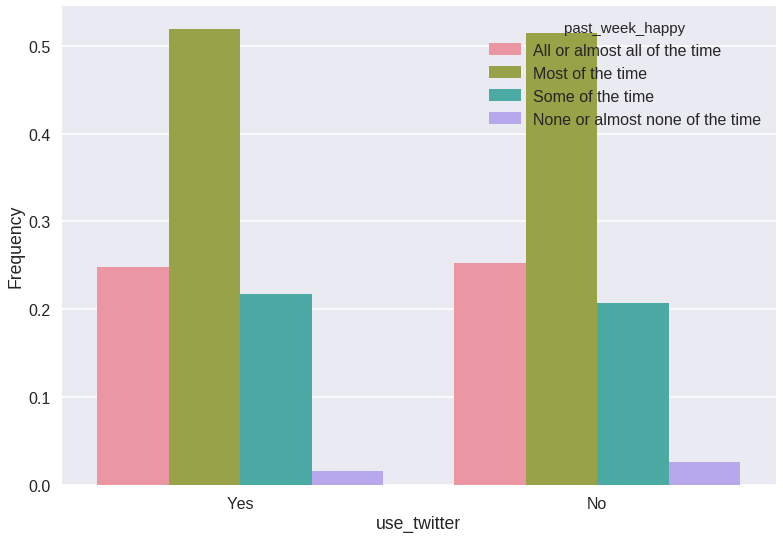

In [32]:
# Plot weekly happiness by Twitter use:

data = data
x_axis = 'use_twitter'
hue = 'past_week_happy'
x_axis_order = ['Yes', 'No']
hue_order = ['All or almost all of the time', 'Most of the time', 'Some of the time', 
             'None or almost none of the time']

freq_plot(data, x_axis, hue, x_axis_order, hue_order)

# Internet Use & Twitter Use

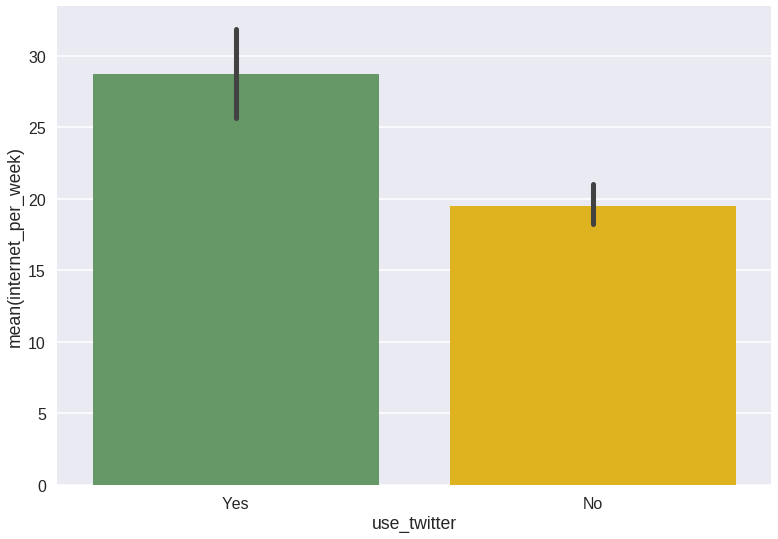

In [33]:
# Plot weekly internet use by weekly happiness:

sns.barplot(data = data, x = 'use_twitter', y = 'internet_per_week',
            order = ['Yes', 'No'])
sns.plt.show()